# Hydrogen Atom Radial Wavefunctions
## Ordinary differential eigenvalue problem


Eigenfunctions are solutions to differential equations that only have solutions for particular values of a parameter.  In quantum mechanics these parameters are the quantized variables- like the energy or angular momentum of the state and are called eigenvalues.  

Solving for the electron wave functions in a hydrogen atom is a standard problem in quantum mechanics. You
solve the Schroedinger equation, which is a partial differential equation,  including the $Ze^2/r$ central potential from the Coulomb force.
One way to solve PDEs is through "separation of variables", which ends up giving you several ordinary differential equations.  For an electron around a proton we obtain an ODE for the wavefunction as a function of radius: 
$$
\left(\frac{d^{2}}{dr^{2}}+\frac{2}{r}\frac{d}{dr}\right)R(r)+\frac{2\mu}{\hbar^{2}}\left(E+\frac{Ze^{2}}{r}-\frac{l(l+1)\hbar^{2}}{2\mu r^{2}}\right)R(r)=0
$$
where $R$ is the radial wavefunction, $r$ the radius, $\mu$ the reduced
mass, $Ze$ the charge of the nucleus, $e$ the charge of the electron
and $l$ the angular momentum quantum number.

We define a new independent variable $\rho$ and
a constant $\lambda$ :
$$
\begin{array}{cc}
\rho=\sqrt{\frac{-8\mu E}{\hbar^{2}}}r & \lambda=\frac{Ze^{2}}{\hbar}\sqrt{\frac{-\mu}{2E}}\end{array};
$$ 

so the equation becomes:

$$
\frac{d^{2}R}{d\rho^{2}}+\frac{2}{\rho}\frac{dR}{d\rho}-\frac{l(l+1)}{\rho^{2}}R+\left(\frac{\lambda}{\rho}-\frac{1}{4}\right)R=0
$$



We can find and plot the wave function using solve_ivp, if we knew $\lambda$ and
$dR/d\rho$ at some point. This is an *eigenvalue* problem-
there only exist (finite) solutions for particular values of $\lambda$.
As you will learn in quantum mechanics, the eigenvalues are
$\lambda=1,2,3,$... 

The length units are u, atomic units.



First consider $\lambda=1, l=0,$ termed the *1s* wavefunction. The boundary conditions we need 
are $R=0$ at infinity, and R finite everywhere. For the $l=0$ wavefunctions, we apply a boundary condition that R=1.0 at the origin and $\frac{dR}{d\rho}=0.0$.  We can't start the integration right at zero, because our equation divides by $\rho$, so we will start at a very small value- say $\rho=$ 1e-9 u and integrate up to a reasonable value- say $\rho=35.0.$  Feel free to explore a wider range, although you will find that a much larger range will result in numerical instability.

The probability density (for the electron position) is given by $r^2 R^2(r)$.  

Solve the differential equation with the above boundary condition.  Find the normalization, $N$ by calculating the integral $N=\int r^2R(r)^2dr =1.0$.
Then plot $r^2 R^2(r)/N$ between 1e-9 and 35 atomic units.



$$
\begin{aligned}
    \left[\frac{\lambda\hbar}{Ze^2}\right]^2&=-\frac{\mu}{2E} \\
    E&=-\frac{\mu}{2}\left[\frac{Ze^2}{\lambda\hbar}\right]^2 \\
    \rho&=r\left[\frac{-8\mu}{\hbar^2}\left(-\frac{\mu}{2}\right)\left(\frac{Ze^2}{\lambda\hbar}\right)^2\right]^{1/2} \\
    &=r\left[\frac{4\mu^2}{\hbar^2}\left(\frac{Ze^2}{\lambda\hbar}\right)^2\right]^{1/2} \\
    \rho&=r\frac{2Z\mu e^2}{\lambda\hbar^2}
\end{aligned}
$$

$$
\begin{aligned}
    G(\rho)&=\frac{dF}{d\rho} \\
    0&=\frac{dG}{d\rho}+\frac{2}{\rho}G(\rho)-\frac{l(l+1)}{\rho^2}R(\rho)+\left(\frac{\lambda}{\rho}-\frac{1}{4}\right)R(\rho) \\
    \frac{d}{d\rho}
    \begin{bmatrix}
        G(\rho) \\
        R(\rho)
    \end{bmatrix}&=
    \begin{bmatrix}
        -\frac{2}{\rho}G(\rho)+\frac{l(l+1)}{\rho^2}R(\rho)+\left(\frac{1}{4}-\frac{\lambda}{\rho}\right)R(\rho) \\
        G(\rho)
    \end{bmatrix}
\end{aligned}
$$

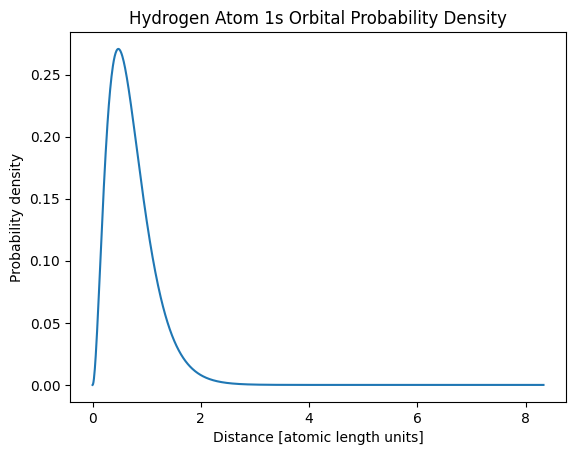

In [52]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.constants import hbar, e, m_p, m_e

Z = 1 # number of protons in H atom
mu = m_e * m_p / (m_e + m_p)
u = scipy.constants.physical_constants["atomic unit of length"][0]

def rho_r(r, _lambda):

    return r * 2 * Z * mu * e ** 2 / _lambda / hbar ** 2

def r_rho(rho, _lambda):

    return rho / (2 * Z * mu * e ** 2 / _lambda / hbar ** 2)

def min_r(_lambda):

    return r_rho(1e-9, _lambda)

def max_r(_lambda):

    return r_rho(35, _lambda)

def wavefunction(rho, y, _lambda, _l):

    G = y[0]
    R = y[1]

    dG_drho = - 2 / rho * G + _l * (_l + 1) / rho ** 2 * R + (1/4 - _lambda / rho) * R
    dR_drho = G

    return [dG_drho, dR_drho]

def R(_lambda, _l, y_0):
    
    sol = scipy.integrate.solve_ivp(wavefunction, [1e-9, 35], y_0, args=(_lambda, _l), dense_output=True, rtol = 1e-10, atol = 1e-10)

    return lambda rho: sol.sol(rho)[1]

def pdf(_lambda, _l, y_0):
    
    R_r = R(_lambda, _l, y_0)
    pdf_tall = lambda r: r ** 2 * R_r(r) ** 2

    N = scipy.integrate.quad(pdf_tall, 1e-9, 35)[0]

    #return lambda r: pdf_tall(r) / N
    return lambda r: pdf_tall(rho_r(r, _lambda)) / N

P = pdf(1, 0, [0, 1])

#r = np.linspace(1e-9, 35, num=1000)
r = np.linspace(r_rho(1e-9, 1), r_rho(35, 1), num=1000)
P_r = P(r)

plt.plot(r, P_r)
plt.xlabel("Distance [atomic length units]")
plt.ylabel("Probability density")
plt.title("Hydrogen Atom 1s Orbital Probability Density")
plt.show()


Now write a function that will calculate, normalize, and add a line to a plot with a label for an arbitrary quantum number $\lambda$ and angular momentum $l$.

Test it out by plotting the 1s,2s,23s, 4s wavefunctions (all with l=0, and $\lambda=1,2,3,4.$

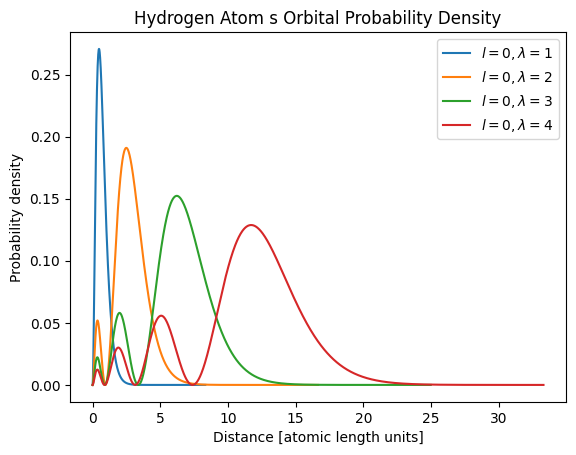

In [54]:
def add_pdf(_lambda, _l, y_0):

    P = pdf(_lambda, _l, y_0)
    r = np.linspace(r_rho(1e-9, _lambda), r_rho(35, _lambda), num=1000)
    P_r = P(r)

    plt.plot(r, P_r, label=f"$l={_l}, \\lambda={_lambda}$")

for i in range(1, 5):

    add_pdf(i, 0, [0, 1])

plt.legend()
plt.xlabel("Distance [atomic length units]")
plt.ylabel("Probability density")
plt.title("Hydrogen Atom s Orbital Probability Density")
plt.show()

Repeat for the p(l=1) and the d (l=2) wavefunctions, plotting the 2-5 p and 3-6 d wavefunctions. The boundary conditions for these wavefunctions is different- R=0 at $\rho=0$, and $\frac {dR}{d\rho}=1.0.$  For the derivative, the value 1 is completely arbitrary, but we will normalize so that our final plot doesn't depend on the exact value.

In a separate plot, try to make a 1p and 1d and 2d wavefunctions-- these don't physically exist because they blow up. (You can't have arbitrary quantum numbers- this kind of behaviour leads to selection rules that limit possible values.)

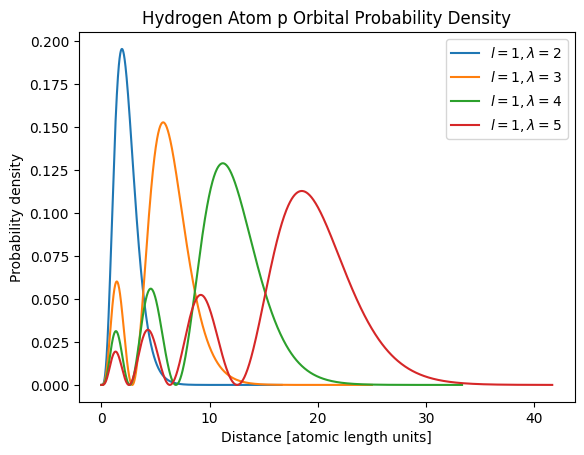

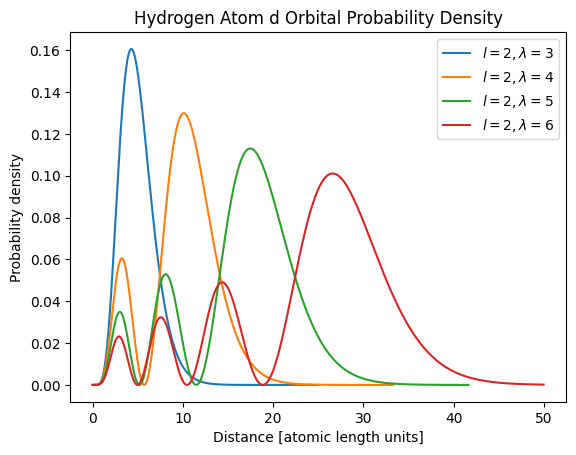

In [56]:
for i in range(2, 6):

    add_pdf(i, 1, [1, 0])

plt.legend()
plt.xlabel("Distance [atomic length units]")
plt.ylabel("Probability density")
plt.title("Hydrogen Atom p Orbital Probability Density")
plt.show()

for i in range(3, 7):

    add_pdf(i, 2, [1, 0])

plt.legend()
plt.xlabel("Distance [atomic length units]")
plt.ylabel("Probability density")
plt.title("Hydrogen Atom d Orbital Probability Density")
plt.show()

What happens if we change the eigenvalues $\lambda=1,2,3,4$ slightly?  Multiply $\lambda$ by 1.0001 and plot the wavefunctions for $l=0$.  Even a small shift in energy(which $\lambda$ corresponds to) makes the wavefunction blow up as you move away from the atom.  Numerically, if we integrate far enough away from the atom(try, for instance going to 100, or even 50), the numerics will make the functions blow up, too- but at $\rho=35$ u one can see that good wavefunctions remain finite at the known values of $\lambda,$ and a deviation as small as .01% causes problems.  Note that at large $\rho$ the wavefunctions do look like $e^{-\rho/2}$, and that gets to be a tiny number when we think about larger values of $\rho.$

Integral of l=0, lambda=1 is 22809.34241653929 on [1e-9, 50] u.
Integral of l=0, lambda=2 is 26904.978111561042 on [1e-9, 50] u.
Integral of l=0, lambda=3 is 6917.14385100323 on [1e-9, 50] u.
Integral of l=0, lambda=4 is 177.37876306024552 on [1e-9, 50] u.


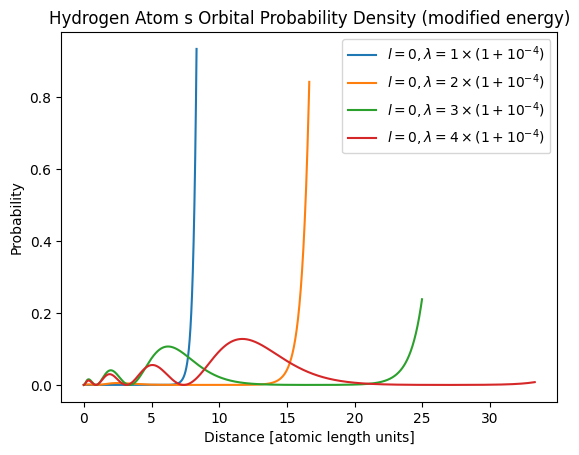

In [57]:
def add_pdf(_lambda, _l, y_0):

    P = pdf(_lambda * 1.0001, _l, y_0)
    r = np.linspace(r_rho(1e-9, _lambda), r_rho(35, _lambda), num=1000)
    P_r = P(r)

    I = scipy.integrate.quad(P, r_rho(1e-9, _lambda), r_rho(50, _lambda))[0]
    # wavefunction is only normalized to 35 u, so this integral will be larger than 1
    print(f"Integral of l={_l}, lambda={_lambda} is", I, "on [1e-9, 50] u.")

    plt.plot(r, P_r, label=f"$l={_l}, \\lambda={_lambda}\\times (1+10^{{-4}})$")

for i in range(1, 5):

    add_pdf(i, 0, [0, 1])

plt.legend()
plt.xlabel("Distance [atomic length units]")
plt.ylabel("Probability")
plt.title("Hydrogen Atom s Orbital Probability Density (modified energy)")
plt.show()

The full wavefunctions are orthonormal- so if we integrate $\int r^2 \Psi*_{\lambda,l,m}\Psi_{\lambda',l',m'} dr=\delta_{\lambda,\lambda'}\delta_{l,l'}\delta_{m,m'}$, where $\delta_{i,i'}=\begin{cases} 1, i=i'\\0,i\ne i'\end{cases}$. Here $\psi$ is the full waveform, with terms corresponding to a product of the radial wave function with an angular momentum wavefunction.  In general, the "R" part of the wavefunction by itself is not orthogonal.  However, if we compare two radial wavefunctions with the same $\lambda$, then
$$\int r^2 R_{\lambda,l}R_{\lambda,l'} dr=\delta_{l,l'}$$
Calculate the R integral between $\lambda=2,l=0$ and $\lambda=2,l=1.$
Repeat for $\lambda=1,l=0$ and $\lambda=2,l=0.$

In [65]:
def R_int(R1, R2, _lambda_1, _lambda_2):

    return scipy.integrate.quad(lambda r: r ** 2 * R1(r) * R2(r), r_rho(1e-9, _lambda_1), r_rho(35, _lambda_2))[0]

R_20 = R(2, 0, [0, 1])
R_21 = R(2, 1, [1, 0])
I_20_21 = R_int(R_20, R_21, 2, 2)

print("Integral between lambda = 2, l = 0 and lambda = 2, l = 1 is", I_20_21)

R_10 = R(1, 0, [0, 1])
R_20 = R(2, 0, [0, 1])
I_10_20 = R_int(R_10, R_20, 1, 2)

print("Integral between lambda = 1, l = 0 and lambda = 2, l = 0 is", I_10_20)

Integral between lambda = 2, l = 0 and lambda = 2, l = 1 is -1.9991421290676843
Integral between lambda = 1, l = 0 and lambda = 2, l = 0 is -0.9998558460185495
